Project - Investigate TMDb movie data set

Summary: 
    This project Uses the TMDB(The Movie Database) data set to determine common characteristics of the most profitable films in the data base. The central idea being what factors are indicators that a film will be successful financially based on the top 80% of profitable films. This data set contains information about roughly 11,000 films (10,866). The following information for each film is provided (column headings): id, imdb_id, popularity, budget revenue original_title cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote average, release_year, budget_adj, revenue_adj. Notes about the columns: the 'cast', 'genres', and 'keywords' columns have multiple pipe (|) delimited values, the two columns ending in _adj show the budget and revenue are amounts stated in 2010 dollars. 
    This project will explore what varaibles are associated with high profit movies. Variables of interest from the data set will be director and runtime. In addition calculated variables of interest will be release_month (derived from release_year), release_DOW (DOW = day of week) (derived from release_year), release date of month(DOM) (derived from release year). All variables of interest will be forward looking, I.E. variables that would be under the control of the film maker prior to the start of production, as such things such as vote_count and vote_average are irrelevant for the purposes of this study as this is information post release and outside a predictive analysis.
    
Methodology
   1. load Tmdb data base as a a csv file
   2. Drop columns of no interest.
   3. Check for duplicated rows in data set
   4. Drop any rows determined to be duplicates
   5. Determine if the basis for the calculated column are missing any values
   6. add calculated column ( net_revenue = revenue_adj - budget_adj). This column will indicate total profit.
   7. Add column with a numeric value of which month the movie was released in.
   8. Create a new dataframe consisting of the movies in the top 80 percent of variabilty
   9. Inspect dataframe and clean as necessary.
   10. Create a new calculated column for day of the week, day of the month, and month number the movie was released on and. 
   11. plot results for variables of interest
   12. Report insights.

Note frequent use of movieDB.shape is a control measure.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodecsv
movieDB = []
movieDB = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
#Inspect head
movieDB.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# get value of dataframe shape (rows X columns)
movieDB.shape

(10866, 21)

In [35]:
#inspect data types
movieDB.dtypes

id                  int64
original_title     object
cast               object
director           object
keywords           object
runtime             int64
genres             object
release_date       object
budget_adj        float64
revenue_adj       float64
net               float64
month_num           int64
DOW                object
DOM                 int64
dtype: object

Upon inspection  the column heads are:imdb_id, popularity, budget, revenue,original_title,cast, homepage, director, tagline, keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


After review. The data is that is of limited use is divided into 3 types:
1) Data that is outside the film makers control: popularity, vote_count, vote_release. As these are facros measured post release,
2) Data that is irrelevent to analysing common factors in profitability as by the very nature of the data ( an inherent limitation) the data is unique and thus ill suited to aggregation such as imbdID, homepage, tagline, 
3) Date that is pointless to measure give the scope of the investigation: release_year (how would a film maker in 1991 travel 10 years forward in time knowing 2021 was a year for profitable movies?)
Next,drop columns with variables of no interest: imdb_id, popularity, budget, revenue, homepage, tagline, overview, production_companies , vote_count, vote_average, release_year

In [ ]:
# drop unneede columns
movieDB.drop(['imdb_id','popularity','budget','revenue','homepage','tagline','overview','production_companies','vote_count','vote_average','release_year'], axis=1, inplace = True)
# expected number of rows is 10
movieDB.shape


Inspect for Duplicates
The only variable of interest where duplicates are a concern is 'original_title', there is a possability of duplicate titles with unique films but if the release date is different then each movie is unique. A calculated field will be created that is a concatenation of title and release date and any possible duplicate returns inspected for duplicates, once possibile duplicare rows are identified and duplicate rows dropped this column will be dropped.
___

In [5]:
movieDB['u_value'] = movieDB['original_title'] + movieDB['release_date']
movieDB.shape

(10866, 11)

In [6]:
# check for duplicates in 'unique_value'
duplicates = movieDB[movieDB.duplicated(['u_value'])]
duplicates


,id,original_title,cast,director,keywords,runtime,genres,release_date,budget_adj,revenue_adj,u_value
2090,42194,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,30000000.0,967000.0,TEKKEN3/20/10


In [7]:
# Inspect rows with duplicates in u_value. Upon inspection these rows are truly duplicates
movieDB.loc[movieDB['u_value'] == 'TEKKEN3/20/10']

,id,original_title,cast,director,keywords,runtime,genres,release_date,budget_adj,revenue_adj,u_value
2089,42194,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,30000000.0,967000.0,TEKKEN3/20/10
2090,42194,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,30000000.0,967000.0,TEKKEN3/20/10


In [8]:
# delete row at rowindex number 2090

movieDB = movieDB.drop(movieDB.index[2090])
movieDB.shape

(10865, 11)

In [10]:
#drop u_value 
movieDB.drop(['u_value'], axis=1, inplace = True)
#confirm drop
movieDB.head()

,id,original_title,cast,director,keywords,runtime,genres,release_date,budget_adj,revenue_adj
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,1.379999e+08,1.392446e+09
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,1.379999e+08,3.481613e+08
2,262500,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,1.012000e+08,2.716190e+08
3,140607,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,1.839999e+08,1.902723e+09
4,168259,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,1.747999e+08,1.385749e+09


In [11]:

#get dataframe for later comparison purposes
movieDB.shape

(10865, 10)

Inspect the data set for missing values in budget_adj and revenue_adj columns, as this investigation is about commen elements in movies based on net revenue and rows with zero value in both will be irrelevent.
    1) get a count for rows with a zero value and a zero value in the revenue_adj column.
    2) drop rows with a zero in both budget_adj and revenue_adj columns
    3) for rows with only one zero in each replace the zero with the average value for that column. 

In [12]:
# determine total rows to be dropped
x = ((movieDB['revenue_adj'] == 0) & (movieDB['budget_adj'] == 0 )).sum()
x

4701

In [13]:
#drop the rows
movieDB = movieDB.drop(movieDB[(movieDB.revenue_adj == 0) & (movieDB.budget_adj== 0)].index)

In [14]:
# get shape value to compare before and after
movieDB.shape

(6164, 10)

4701 rows were dropped - given that the focus of this investigation is commen traits among profitabile movies then movies with no profitability value ( a revenue value of zero minus a budget value of zero will equal a zero profitibity) are irrelevent

In [15]:
#get a count for rows with a zero value in budget_adj column and a count for rows with a zero value in the revenue_adj column. These will be the rows values are supplied for.
x =(movieDB['revenue_adj']  == 0 ).sum()
y = (movieDB['budget_adj']  == 0 ).sum() 
print(x, y)

1315 995


For rows were there is a zero in budget_adj column the zero will be replaced by the average value of the column (excluding columns that are zero). 

In [16]:
# get average value for revenue_adj exluding rows with zeros in that column this will be compared to value 
column_average = movieDB[movieDB['revenue_adj'] != 0].revenue_adj.mean()
#replace zero value in revenue_adj column with the column_average value
movieDB.loc[movieDB['revenue_adj'] == 0,'revenue_adj'] = column_average


In [17]:
#confirm that there are no longer any zero values in the 'revenue_adj' column
x =(movieDB['revenue_adj']  == 0 ).sum()
print(x)


0


In [18]:
#Go through the same process for the 'budget_adj'
column_average2 = movieDB[movieDB['budget_adj'] != 0].budget_adj.mean()
movieDB.loc[movieDB['budget_adj'] == 0,'budget_adj'] = column_average2
#confirm that there are no longer any zero values in the 'budget_adj' column
y =(movieDB['budget_adj']  == 0 ).sum()
print(y)

0


In [19]:
# with the zero values removed create a calculated column, net revenue
movieDB['net'] = movieDB['revenue_adj'] - movieDB['budget_adj']
movieDB.shape

(6164, 11)

In [20]:
#inspect head to confirm column(s) creation
movieDB.head()

,id,original_title,cast,director,keywords,runtime,genres,release_date,budget_adj,revenue_adj,net
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,1.747999e+08,1.385749e+09,1.210949e+09


The top 20% of rows by (sorted by net revenue) will be identified and a new data frame created. This will be the data set of interest for this investigation.
1) Create a new data froam sorting the data frame by 'net' descending
2) add a column starting at 1 and incrementing by 1 for each row
3) determine the count for the top 20% of rows (using the Pareto Principle that 80% of outcomes come from 20% of causes ( https://en.wikipedia.org/wiki/Pareto_principle )
4) using the 20% count take that subset to create a new data frame movieDB_pp

In [21]:
#create sorted data frame
movieDB_sort = movieDB.sort_values(by='net',ascending=False)

In [22]:
#add a column starting at 1 and incrementing by 1 for each row
movieDB_sort['count'] = np.arange(len(movieDB_sort)) + 1

In [23]:
movieDB_sort.shape

(6164, 12)

In [24]:
#count for top 20% of rows
x = int(len(movieDB_sort)*.2)
x

1232

In [26]:
#Create dateframe of the top 20% net revenue
movieDB_pp = movieDB_sort[movieDB_sort['count'] <= x]

In [27]:
# inspect shape od new data frame expexted value is 1232 x 12
movieDB_pp.shape 

(1232, 12)

In [28]:
#inspect new dataframe for null value, unless there is a null count greater than 10% of values in a column, the count will be irrelevent in the next stage of analysis,
movieDB_pp.isnull().sum()

id                 0
original_title     0
cast               4
director           1
keywords          57
runtime            0
genres             1
release_date       0
budget_adj         0
revenue_adj        0
net                0
count              0
dtype: int64

In [29]:
# given the small number of nulls there is no need to further cleanse data

Exploratory Data Analysis
At this point we will attempt a detemination of what factors are commen in high net revenue movies.
1)Drop irrelevet columns (id, budget_adj, revenue_adj,count
2) add calulated columns for day of week, date of month and, month number.
2)Visualize data

In [30]:
#suppress error warnings
pd.options.mode.chained_assignment = None  # default='warn'
#drop unneed columns
movieDB_pp.drop(['budget_adj', 'revenue_adj', 'count'], axis=1, inplace = True) 
movieDB_pp.shape

/Users/michaelmohle/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1232, 9)

In [31]:

#based on information above there are no missing values in 'release_date'
# create calculated columns for month number, day of week and date of month
movieDB_pp['month_num'] = pd.DatetimeIndex(movieDB_pp['release_date']).month
movieDB_pp['DOW'] = pd.DatetimeIndex(movieDB_pp['release_date']).day_name()
movieDB_pp['DOM'] = pd.DatetimeIndex(movieDB_pp['release_date']).day
#inspect head to confirm
movieDB_pp.head()

<ipython-input-31-c11c05df8b27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movieDB_pp['month_num'] = pd.DatetimeIndex(movieDB_pp['release_date']).month
<ipython-input-31-c11c05df8b27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movieDB_pp['DOW'] = pd.DatetimeIndex(movieDB_pp['release_date']).day_name()
<ipython-input-31-c11c05df8b27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,id,original_title,cast,director,keywords,runtime,genres,release_date,net,month_num,DOW,DOM
1329,11,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Adventure|Action|Science Fiction,3/20/77,2.750137e+09,3,Sunday,20
1386,19995,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,2.586237e+09,12,Thursday,10
5231,597,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,11/18/97,2.234714e+09,11,Tuesday,18
10594,9552,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,exorcism|holy water|religion and supernatural|...,122,Drama|Horror|Thriller,12/26/73,2.128036e+09,12,Wednesday,26
9806,578,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,fishing|atlantic ocean|bathing|shipwreck|polic...,124,Horror|Thriller|Adventure,6/18/75,1.878643e+09,6,Wednesday,18


In [42]:
movieDB_pp.shape


(1232, 12)

In [ ]:
Now we will enter the vizualazation stage, a quick vizulazation will be created as a starting point.

array([[<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'month_num'}>],
       [<AxesSubplot:title={'center':'DOM'}>, <AxesSubplot:>]],
      dtype=object)

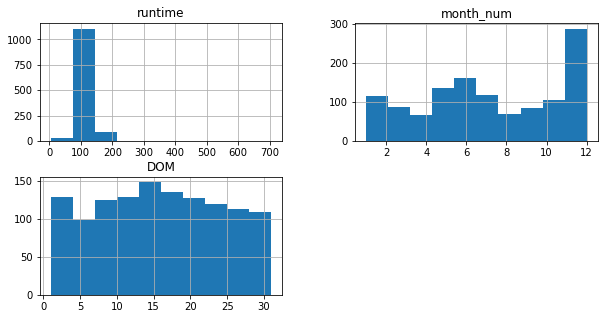

In [64]:
#Create histograms for appropriate data types
movieDB_pp.hist(column = ['runtime','month_num','DOM'], figsize = (10,5))

Given the above visualzations:
Initial analysis indicates profitabilty id assossiated with a runtime of 100 _ 120 Minutes, more study is requied to draw a conclusion for DOM.

Using value_counts investigate DOW and director columns

In [44]:
a = movieDB_pp['DOW'].value_counts()
b = movieDB_pp['director'].value_counts()[:5]



In [45]:
Vizualize value counts


<AxesSubplot:>

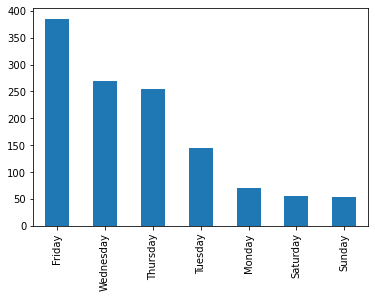

In [43]:
a.plot(kind ='bar')
#vizualize Day of week

<AxesSubplot:>

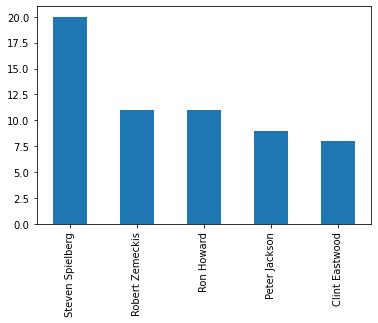

In [42]:
# Vizualize Top five directors
b.plot(kind = 'bar')

Conclusions;
The focus of this Based upon this it appears as Friday is the best day of the week for release, and Steven Spielburg the choice of director most profitable movie.


Conclusions: This investiagation was looking into the common factors of highly (defined as top 80% of revenue, following the Pareto principle that the top 20% have 80% of the impact ) profitabile movies that would be under the control of the production company. 4 factors are common for the most profitabile movies: 1) runtime of roughly 100 minutes, 2) December release, 3) Friday release day, and 4) Steven Spielberg being the director.

Limitations in the data:
1) Production company is irrelevent as the focus of the study was factors within a  production companies control (such as a Monday release day or September release month), these factors are seen through the lense of a generic production company.
2) Date of month is inconclusive. Based on the date there does not appear to be a clease best date of month.
3)Some values are irrelevent to this study as they concern factors that happen after release of the movie: popularity, vote_count, vote_average. and as thus cleary out of the control of a production company
4) Release_ year is irrelevent as while a film maker has conrol over the day of week of release or month of release, release year release discreation is not a practical matter.
5) Some data is inherently ill-suited to aggregation such as imbdID, homepage, tagline.[image.png](attachment:image.png)
Suggested further investigations: 
It would be valuable to revist this study if it were possible to capture net revenue by country, would the same top level insights hold up on a per country basis ( maybe Tuesday is the best day to release a film in Italy)
